# Data Science and Business Analytics Intern at The Sparks Foundation
### Task - 4 : Exploratory Data Analysis on "IPL" Dataset
## Author : Veerendra RV
### Problem Statement : As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team.

In [1]:
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

import plotly.graph_objects as go
import plotly.express as px

In [2]:
 ##Reading deliveries data
deliveries=pd.read_csv("C:/Users/INDIA/Downloads/Indian Premier League/deliveries.csv")

In [3]:
##Reading matches data
matches=pd.read_csv("c:/Users/INDIA/Downloads/Indian Premier League/matches.csv")

In [4]:
## View top 5 rows 
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
## View top 5 rows 
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
## View bottom 5 rows 
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [7]:
## View bottom 5 rows 
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [8]:
## Deliveries data information
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
## Matches data information
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
## Statistics of matches data
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
## Statistics of deliveries data
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
## Shape of Deliveries data
deliveries.shape

(179078, 21)

In [13]:
## Shape of Matches data
matches.shape

(756, 18)

In [14]:
## Checking null values in Deliveries data
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
## Checking null values in Matches data
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [16]:
## Drop umpire3 column as it contains more null values
matches=matches.drop(columns=["umpire3"],axis=1)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [17]:
## Finding columns where cities are null
matches[matches['city'].isna()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [18]:
## Filling missing city in the column
matches['city'].fillna('Dubai',inplace=True)

In [19]:
## Finding columns wher umpire1 is null
matches[matches['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [20]:
## Filling missing data
matches.loc[4, 'umpire1']='V Sharma'
matches.loc[4, 'umpire2']= 'S Ravi'

matches.loc[753, 'umpire1']='B Oxenford'
matches.loc[753, 'umpire2']= 'S Ravi'

In [21]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

In [22]:
## Printing all the cities hosted IPL matches
sorted(matches['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [23]:
## Changing Bengaluru to Banglore
matches['city']=matches['city'].replace('Bengaluru','Banglore')

In [24]:
## Printing all the IPL teams
sorted(matches['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [25]:
## Changing Rising Pune Supergiants to Rising Pune Supergiant
matches=matches.replace('Rising Pune Supergiants','Rising Pune Supergiant')
sorted(matches['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

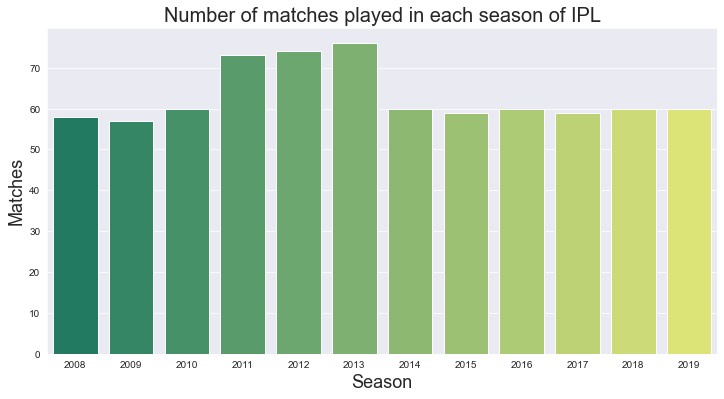

In [26]:
## Plotting graph for matches played in each season of IPL
plt.figure(figsize=(12,6))
sns.countplot('season',
             data=matches,
             palette='summer')
plt.title('Number of matches played in each season of IPL',fontsize=20)
plt.xlabel('Season',fontsize=18)
plt.ylabel('Matches',fontsize=18)
plt.show()

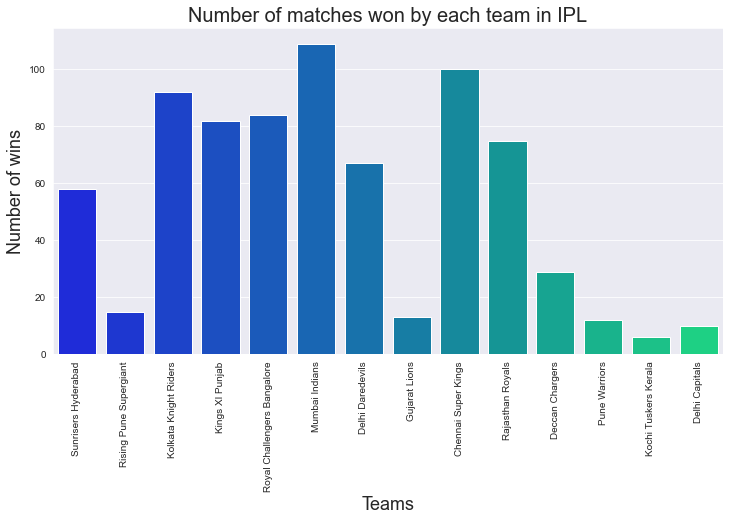

In [27]:
## Plotting graph for matches won by each team
plt.figure(figsize=(12,6))
sns.countplot(x='winner',
             data=matches,
             palette='winter')
plt.title('Number of matches won by each team in IPL',fontsize=20)
plt.xlabel('Teams',fontsize=18)
plt.ylabel('Number of wins',fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [28]:
matches['win_by']=np.where(matches['win_by_runs']>0, 'Bat_first','Bowl_first')

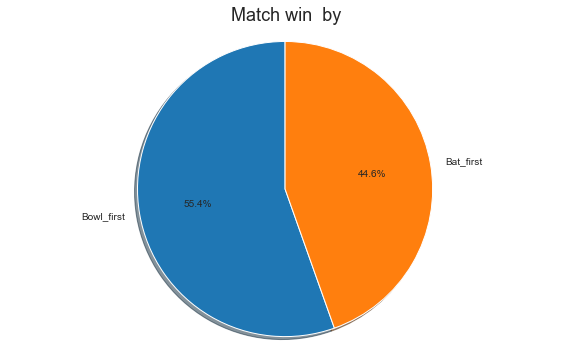

In [29]:
## Plottig pie chart to show winning team bowl first or  bat first
win=matches.win_by.value_counts()
labels=np.array(win.index)
sizes=win.values
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Match win  by',fontsize=18)
plt.axis('equal')
plt.show()

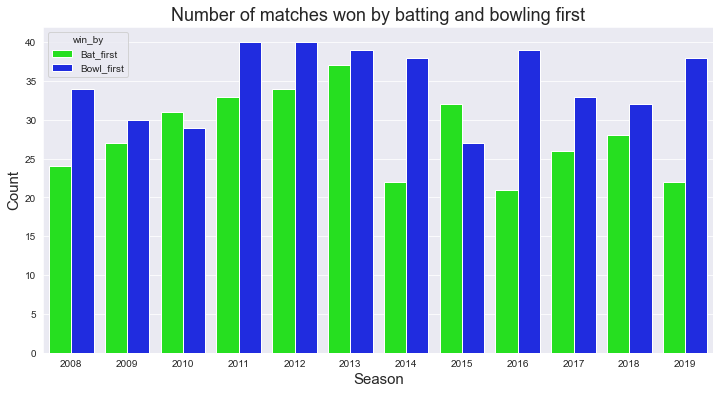

In [30]:
## Plotting the graph of bat first and bowl first in season
plt.figure(figsize=(12,6))
sns.countplot('season',hue='win_by',data=matches,palette='hsv')
plt.title('Number of matches won by batting and bowling first',fontsize=18)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

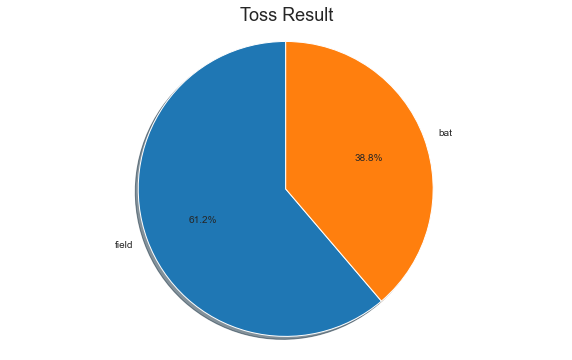

In [31]:
## Plot Pie chart on toss decision
plt.figure(figsize=(10,6))
Toss=matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes=Toss.values
plt.pie(sizes,labels=labels,
       autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Toss Result', fontsize=18)
plt.axis('equal')
plt.show()

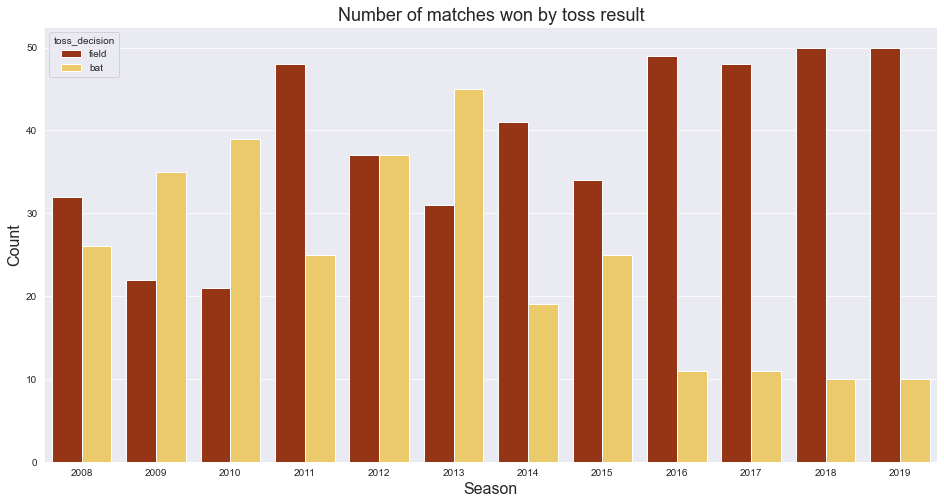

In [32]:
## Plot a graph on number of matches won by Toss result
plt.figure(figsize=(16,8))
sns.countplot('season',
              hue='toss_decision',
              data=matches,
             palette='afmhot')
plt.title('Number of matches won by toss result',fontsize=18)
plt.xlabel('Season',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [33]:
## Plotting top 10 cities hosted IPL matches
most_played_city=matches['city'].value_counts()[:10].reset_index()
most_played_city.columns=['city','count']

fig=px.bar(most_played_city, x='city',y='count',
          text=most_played_city['count'],
          title='Top 10 Cities Hosted IPL Matches')
plt.show()

In [34]:
## Plotting top 10 venues(venues) hosted IPL matches
most_played_venue=matches['venue'].value_counts()[:10].reset_index()
most_played_venue.columns=['venue','count']

fig=px.bar(most_played_venue, x='venue',y='count',
          text=most_played_venue['count'],
          title='Top 10 venues Hosted IPL Matches')
plt.show()

In [35]:
## Finding played match vs win match for each team
team_played_wins=pd.DataFrame((team,matches[(matches['team1']==team) | (matches['team2']==team)].\
shape[0],matches[matches['winner']==team].shape[0]) for team in matches['team1'].unique())
team_played_wins.columns=['Team','Played Matches','Win Matches']
team_played_wins=team_played_wins.sort_values(by='Played Matches',ascending=False)
team_played_wins

,Team,Played Matches,Win Matches
1,Mumbai Indians,187,109
4,Royal Challengers Bangalore,180,84
5,Kolkata Knight Riders,178,92
7,Kings XI Punjab,176,82
8,Chennai Super Kings,164,100
6,Delhi Daredevils,161,67
9,Rajasthan Royals,147,75
0,Sunrisers Hyderabad,108,58
10,Deccan Chargers,75,29
12,Pune Warriors,46,12


In [36]:
## Print wins per season for each team
wins_per_season=matches.groupby('season')['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [37]:
## Print winner season wise
final_matches=matches.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [38]:
## Print number of seasons won by each teams
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [39]:
## Print man of the match in finals
final_matches[['season','winner','player_of_match']].reset_index(drop=True)

,season,winner,player_of_match
0,2017,Mumbai Indians,KH Pandya
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting


In [40]:
## Print toss winner, toss decision, winner in final matches
final_matches[['season','toss_winner','toss_decision','winner']].reset_index(drop=True)

,season,toss_winner,toss_decision,winner
0,2017,Mumbai Indians,bat,Mumbai Indians
1,2008,Rajasthan Royals,field,Rajasthan Royals
2,2009,Royal Challengers Bangalore,field,Deccan Chargers
3,2010,Chennai Super Kings,bat,Chennai Super Kings
4,2011,Chennai Super Kings,bat,Chennai Super Kings
5,2012,Chennai Super Kings,bat,Kolkata Knight Riders
6,2013,Mumbai Indians,bat,Mumbai Indians
7,2014,Kolkata Knight Riders,field,Kolkata Knight Riders
8,2015,Chennai Super Kings,field,Mumbai Indians
9,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [41]:
## Print number of seasons won by each team
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [42]:
## Print man of the match player in finals
final_matches[['season','winner','player_of_match']].reset_index(drop=True)

,season,winner,player_of_match
0,2017,Mumbai Indians,KH Pandya
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting


In [43]:
## Adding Iid,season and winner in deliveries data
season_data=matches[['id','season','winner']]

complete_del_data=deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')
complete_del_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,11415,2019,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,11415,2019,Mumbai Indians


In [44]:
## Print number of fours hit by teams
four_data=complete_del_data[complete_del_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs_by_fours','sum'),('fours','count')])

,runs_by_fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


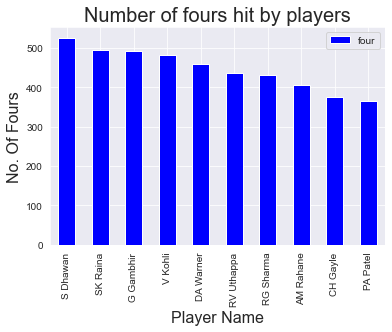

In [45]:
## Plot number of fours hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).\
reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='blue')
plt.title('Number of fours hit by players',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Player Name',fontsize=16)
plt.ylabel('No. Of Fours',fontsize=16)
plt.show()

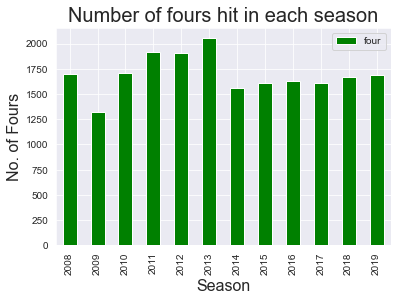

In [46]:
## Plot number of fours hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().\
plot('season','four',kind='bar',color='green')
plt.title('Number of fours hit in each season',fontsize=20)
plt.xlabel('Season',fontsize=16)
plt.ylabel('No. of Fours',fontsize=16)
plt.show()

In [47]:
## Print number of sixes hit by each team
six_data=complete_del_data[complete_del_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


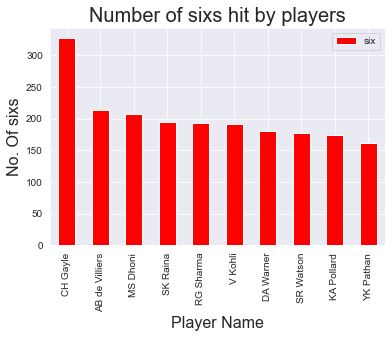

In [48]:
## Plot number of sixes hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().\
sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title('Number of sixs hit by players',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Player Name',fontsize=16)
plt.ylabel('No. Of sixs',fontsize=16)
plt.show()

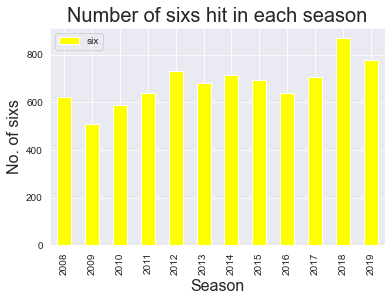

In [49]:
## Plot number of sixs hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color='yellow')
plt.title('Number of sixs hit in each season',fontsize=20)
plt.xlabel('Season',fontsize=16)
plt.ylabel('No. of sixs',fontsize=16)
plt.show()

In [50]:
## Print top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().\
sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
top10batsmans=batsman_score.iloc[:10,:]
top10batsmans

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


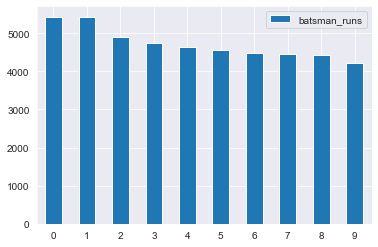

In [51]:
## Plotting player scored most runs in the IPL
top10batsmans.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [52]:
## Print most wicket takers in IPL
wickets_data=deliveries.dropna(subset=['dismissal_kind'])
wickets_data=wickets_data[~wickets_data['dismissal_kind'].\
                        isin(['run out','retired hurt','obstructing the field'])]

top10bowlers=wickets_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().\
sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]
top10bowlers

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


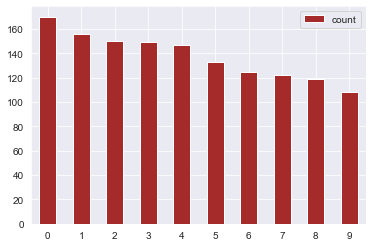

In [53]:
## Potting most wicket taken players in the IPL
top10bowlers.plot(kind='bar',color='brown')
plt.xticks(rotation=0)
plt.show()

## Conclusion:

1. Mumbai Indians is the most successful team in the histoty of IPL
2. Chris Galye has won the maximum number of player of the match awards
3. Eiden garden gas hosted maximum nuber of IPL matches
4. Lasith Mallinga has taken most number of wickets
5. Virat kohli is the top run scorer in the IPL
6. Mumbai Indians has won the most number of IPL titles.

# Thank You